# Classifying MNIST using Multi-Layer Perceptron (MLP)


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels) # these are now one-hot encoded
test_labels = to_categorical(test_labels)


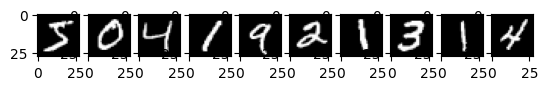

number of training images: 60000
number of test images: 10000


In [8]:
# visualizing

from IPython.display import Image

def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)

def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)

def show_online_image(target_url):
    Image(url= target_url)

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title="label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([]);
        idx += 1
    plt.show()


def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    print(train_history.history.keys())

    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])

    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])

    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


imgplot = show_images(train_images[0:10])

# check the size of our dataset
print("number of training images:",train_images.shape[0])
print("number of test images:",test_images.shape[0])



In [9]:
# build an MLP model

# update all the training, testing dataset.
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize them into range [0, 1]
train_images /= 255
test_images /= 255

from keras import layers

num_classes = 10


In [10]:
model = keras.Sequential(
    [
        #input layer
        layers.Dense(256, input_shape=(28*28,), activation='relu'),
        #hidden layer
        layers.Dense(256, activation='relu'),
        #output layer
        layers.Dense(num_classes, activation='softmax')
    ]
);
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Compile the model, choose optimizer, loss and metrics

model.compile(optimizer='adam', # best for most cases
              loss='categorical_crossentropy', #using categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy']) # using precision or recall caused an error in fitting
                                                # TypeError: 'str' object is not callable

In [12]:
# train the model and save the history. Define epochs, batch_size and validation_split

batch_size = 256  #number of training examples utilized in one iteration
epochs = 10 #an epoch is one complete pass through the entire training
            # dataset during the training phase. During each epoch, the model
            # processes the entire dataset, computes the loss, and updates its weights.
validation_split = 0.2

history = model.fit(train_images,
                    train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split)

Epoch 1/10
188/188 [==============================] - 1s 4ms/step - loss: 1.4602 - accuracy: 0.5455 - val_loss: 0.7296 - val_accuracy: 0.7760
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.5935 - accuracy: 0.8249 - val_loss: 0.4437 - val_accuracy: 0.8787
Epoch 3/10
188/188 [==============================] - 1s 4ms/step - loss: 0.4202 - accuracy: 0.8786 - val_loss: 0.3586 - val_accuracy: 0.8963
Epoch 4/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3637 - accuracy: 0.8945 - val_loss: 0.3304 - val_accuracy: 0.9031
Epoch 5/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.9049 - val_loss: 0.3049 - val_accuracy: 0.9107
Epoch 6/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3112 - accuracy: 0.9103 - val_loss: 0.2855 - val_accuracy: 0.9172
Epoch 7/10
188/188 [==============================] - 1s 4ms/step - loss: 0.2913 - accuracy: 0.9161 - val_loss: 0.2703 - val_accuracy: 0.9236
Epoch 

In [13]:
def plotter(x,y):
    plt.plot(x,y)
    plt.show()

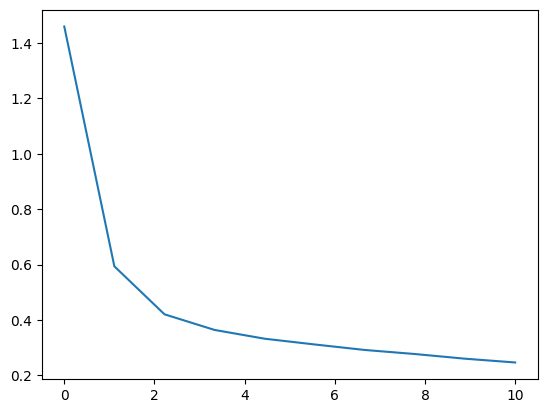

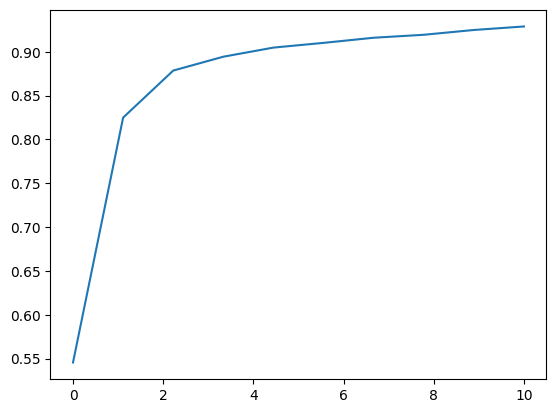

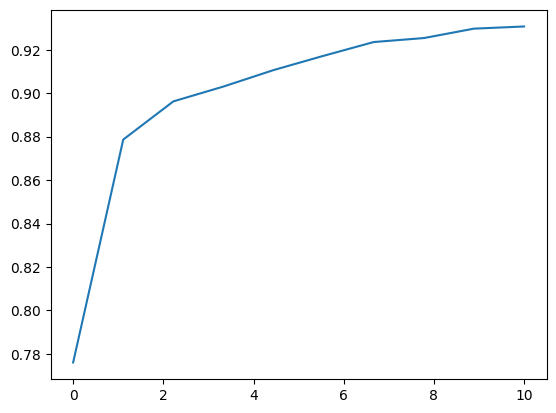

In [14]:
# plot training & validation accuracy values and loss values per epoch
import numpy as np
x = np.linspace(0, len(history.history['loss']), len(history.history['loss']))
plotter(x,history.history['loss'])
plotter(x,history.history['accuracy'])
plotter(x,history.history['val_accuracy'])

In [15]:
# evaluate the model on the test set and report test accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 881us/step - loss: 0.2478 - accuracy: 0.9263

Test accuracy: 0.9262999892234802


In [16]:
# explore the impact of different hyper-parameters e.g. number of hidden layers on training and testing performance

def train_test_NN(num_of_hidden_layers: int):
    model = keras.Sequential(
        [
            #input layer
            layers.Dense(256, input_shape=(28*28,), activation='relu'),
            #hidden layer
            layers.Dense(num_of_hidden_layers, activation='relu'),
            #output layer
            layers.Dense(num_classes, activation='softmax')
        ]
    );

    model.compile(optimizer='adam', # best for most cases
                loss='categorical_crossentropy', #using categorical_crossentropy for one-hot encoded labels
                metrics=['accuracy']) # using precision or recall caused an error in fitting
                                                    # TypeError: 'str' object is not callable

    batch_size = 256  # i'll use all of them #number of training examples utilized in one iteration
    epochs = 10
    validation_split = 0.2

    history = model.fit(train_images,
                        train_labels,
                        epochs=epochs,
                        validation_split=validation_split)

    test_loss, test_acc = model.evaluate(test_images, test_labels)

    print('\nTest accuracy:', test_acc)
    return test_acc

In [17]:
train_test_NN(100)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8029 - accuracy: 0.7496 - val_loss: 0.4160 - val_accuracy: 0.8770
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3900 - accuracy: 0.8865 - val_loss: 0.3338 - val_accuracy: 0.9027
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3288 - accuracy: 0.9039 - val_loss: 0.2968 - val_accuracy: 0.9148
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2886 - accuracy: 0.9154 - val_loss: 0.2534 - val_accuracy: 0.9265
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2575 - accuracy: 0.9238 - val_loss: 0.2355 - val_accuracy: 0.9300
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2278 - accuracy: 0.9325 - val_loss: 0.2082 - val_accuracy: 0.9395
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2008 - accuracy: 0.9402 - val_loss: 0.1855 - val_accuracy:

0.9520000219345093

In [18]:
train_test_NN(60)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8328 - accuracy: 0.7589 - val_loss: 0.4297 - val_accuracy: 0.8762
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4023 - accuracy: 0.8831 - val_loss: 0.3465 - val_accuracy: 0.9009
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3378 - accuracy: 0.9014 - val_loss: 0.3043 - val_accuracy: 0.9092
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2998 - accuracy: 0.9124 - val_loss: 0.2717 - val_accuracy: 0.9197
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9223 - val_loss: 0.2422 - val_accuracy: 0.9282
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2370 - accuracy: 0.9303 - val_loss: 0.2133 - val_accuracy: 0.9382
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2104 - accuracy: 0.9386 - val_loss: 0.1889 - val_accuracy:

0.9544000029563904

## reducing the number of hidden units reduces the training and test accuracy, and increases the loss in training, as seen in the outputs

In [19]:
# explore the impact of training set size on training and testing performance (keep the same testing set while varying the training set)

accuracies = []
sizes = [40000, 30000, 10000, 5000, 2000]
for size in sizes:
    train_images = train_images[:size]
    train_labels = train_labels[:size]

    accuracies.append(train_test_NN(256))

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8567 - accuracy: 0.7302 - val_loss: 0.4585 - val_accuracy: 0.8627
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3932 - accuracy: 0.8848 - val_loss: 0.3606 - val_accuracy: 0.8894
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3292 - accuracy: 0.9046 - val_loss: 0.3178 - val_accuracy: 0.9064
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2852 - accuracy: 0.9163 - val_loss: 0.2855 - val_accuracy: 0.9135
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2473 - accuracy: 0.9273 - val_loss: 0.2455 - val_accuracy: 0.9256
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2166 - accuracy: 0.9357 - val_loss: 0.2410 - val_accuracy: 0.9256
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1901 - accuracy: 0.9434 - val_loss: 0.2002 - val_accuracy:

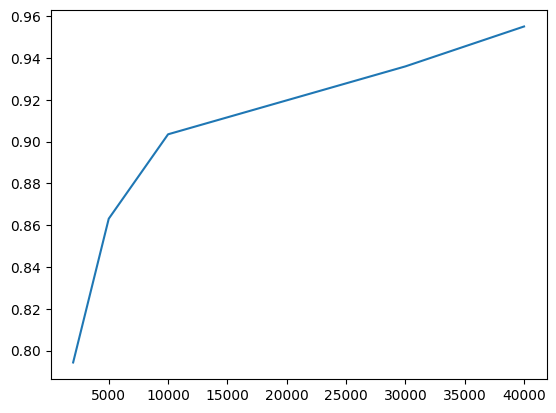

In [20]:
plotter(sizes, accuracies)

x- train size, y- accuracy
